In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
plt.rc('figure', facecolor='w')
plt.rc('font', size=11)

In [2]:
def read_pmf(filename):
    return np.loadtxt(filename).T[:2]

string = np.loadtxt('data/DHFR.string').T
full_pmf = read_pmf('data/DHFR_pmf.dat')
split_pmf = np.array([read_pmf(f'data/DHFR_split_pmf/{i}.dat') for i in range(1, 6)])
react_idx = np.argmin(full_pmf[1][:20])
full_pmf[1] = full_pmf[1] - full_pmf[1][react_idx]
split_pmf[:,1,:] = split_pmf[:,1,:] - split_pmf[:,1,react_idx][:,None]
err = np.std(split_pmf[:,1,:], axis=0)
rms = np.loadtxt('data/DHFR_rms.dat').T

/home/kirill/anaconda3/envs/PTP1B/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [3]:
rms_node_closed = rms[1::2]
rms_node_open = rms[2::2]

In [4]:
s = np.array([np.loadtxt(f'data/s_DHFR/{i+1}.dat')[:,0] for i in range(80)])

In [5]:
y, x = np.histogram(s, bins=50, range=(np.min(s), np.max(s)+1E-6))
bin_centers = (x[1:] + x[:-1]) / 2
nbins = len(y)
bin_width = x[1] - x[0]
bin_idx = ((s - x[0]) // bin_width).astype(int)
counts = np.array([np.sum(bin_idx == i) for  i in range(len(x)-1)])

In [6]:
def mean_by_bins(data, bin_idx):
    return np.array([np.mean(data[bin_idx == i]) 
                     for i in range(np.max(bin_idx) +1)])

def std_by_bins(data, bin_idx):
    return np.array([np.std(data[bin_idx == i]) 
                     for i in range(np.max(bin_idx) + 1)])
    
mean_rms_closed = mean_by_bins(rms_node_closed, bin_idx)
std_rms_closed = std_by_bins(rms_node_closed, bin_idx)
mean_rms_open = mean_by_bins(rms_node_open, bin_idx)
std_rms_open = std_by_bins(rms_node_open, bin_idx)

In [7]:
def plot_a(ax):
    ax.set_xlabel('s (a.m.u.$^{1/2}\cdot\AA$)')
    ax.set_ylabel('PMF (kcal/mol)')
    ax.plot(full_pmf[0], full_pmf[1], c='navy')
    ax.axvline(9, lw=1, c='#aaa', zorder=-100)
    ax.axvline(24, lw=1, c='#aaa', zorder=-100)
    ax.fill_between(full_pmf[0],  full_pmf[1] - err, 
                    full_pmf[1] + err,
                    facecolor='blue',
                    alpha=0.2)
    ax.text(3,-0.15,'closed')
    ax.text(36,-0.15,'open')

In [8]:
def plot_b(ax):
    ax.set_xlabel('s (a.m.u.$^{1/2}\cdot\AA$)')
    ax.set_ylabel('RMSD ($\AA$)')
    ax.set_ylim(0.4, 2.45)
    x = bin_centers
    ax.plot(x, mean_rms_closed, label='closed', c='blue')
    ax.plot(x, mean_rms_open, label='open', c='red')    
    ax.axvline(9, lw=1, c='#aaa', zorder=-100)
    ax.axvline(24, lw=1, c='#aaa', zorder=-100)
    ax.fill_between(x, 
                    mean_rms_closed - std_rms_closed, 
                    mean_rms_closed + std_rms_closed,
                    facecolor='blue',
                    alpha=0.2)
    ax.fill_between(x, 
                    mean_rms_open - std_rms_open, 
                    mean_rms_open + std_rms_open,
                    facecolor='red',
                    alpha=0.2)
    ax.legend()

In [9]:
def plot_c(ax1):
    ax1.set_xlabel('s (a.m.u.$^{1/2}\cdot\AA$)')
    ax1.set_ylabel('Angle ($\degree$)', labelpad=-5)
    ax1.set_ylim(-180,350)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Distance ($\AA$)')
    ax2.set_ylim(1,17)
    x = string[0]

    colors = ('blue', 'red', 'green', 'orange', 'violet')
    labels = ('$\Psi_{17}$', 
              '$\Phi_{18}$',
              '$\Phi_{17}$',
              '$d_1$', 
              '$d_2$')
    lines = []
    for y, c in zip(string[3:6], colors[2:]):
        line, = ax1.plot(x, y, c=c)    
        lines.append(line)
    for y, c in zip(string[1:3], colors[:2]):
        line, = ax2.plot(x, y, c=c, linestyle='dashed')    
        lines.append(line)
        
    ax1.axvline(9, lw=1, c='#aaa', zorder=-100)
    ax1.axvline(24, lw=1, c='#aaa', zorder=-100)

    ax1.legend(lines, labels, loc='lower center', 
               ncol=5, columnspacing=0.5, handletextpad=0.4, framealpha=1 )

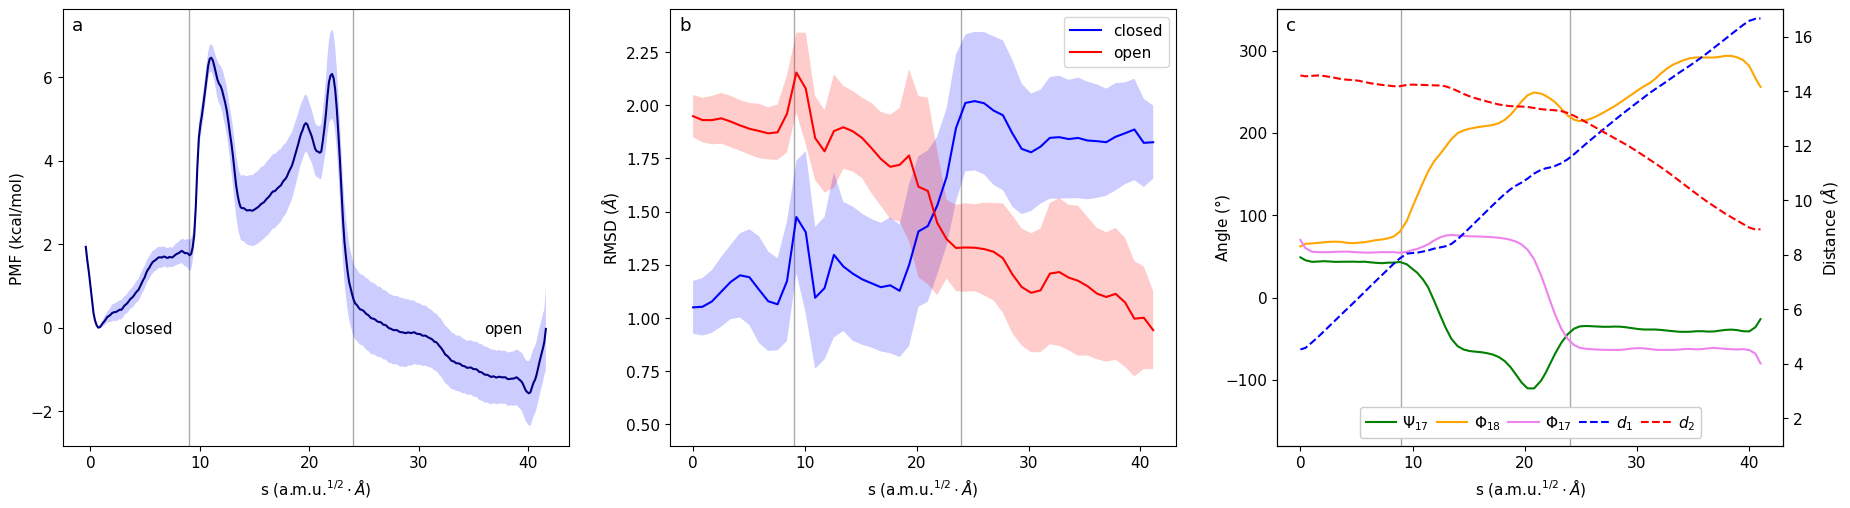

In [10]:
fig, axs = plt.subplot_mosaic([['a', 'b', 'c']], figsize=(18,5))
fig.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plot_a(axs['a'])
plot_b(axs['b'])
plot_c(axs['c'])

for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(-0.01, 1.0, label, transform=ax.transAxes + trans,
            verticalalignment='top', fontsize='large')

plt.savefig('Fig6.png', dpi=300, bbox_inches='tight')
plt.show()